In [1]:
import pandas as pd

In [2]:
zomato = pd.read_csv('D:/Documents/DAS/KRPRO_Python/24012024/advance_python/dataset/Zomato_Dataset.csv')

In [3]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
zomato.isnull().sum() # identifying null values 

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

## Missing null value imputation

### Age

In [5]:
# Age
MEDIAN_Delivery_person_Age = zomato['Delivery_person_Age'].median()   
print(MEDIAN_Delivery_person_Age)

30.0


In [6]:
zomato['Delivery_person_Age'].fillna(MEDIAN_Delivery_person_Age, inplace = True)

### Ratings

In [7]:
# Ratings
MEDIAN_Delivery_person_Ratings = zomato['Delivery_person_Ratings'].median()   
zomato['Delivery_person_Ratings'].fillna(MEDIAN_Delivery_person_Ratings, inplace = True)

### Weather_conditions

In [8]:
# Weather_conditions              
zomato['Weather_conditions'].value_counts()

Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

In [9]:
# In weather condition, all the values are almost similiar weightage in data

# We will impute with normal weather condition i.e Sunny

In [10]:
zomato['Weather_conditions'].fillna('Sunny', inplace = True)
zomato['Weather_conditions'].value_counts()

Sunny         7898
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Name: Weather_conditions, dtype: int64

### Road_traffic_density  

In [11]:
## Road_traffic_density   
zomato['Road_traffic_density'].value_counts()

Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

In [12]:
zomato['Road_traffic_density'].fillna('Low', inplace = True)

### Multiple deliveries

In [13]:
zomato['multiple_deliveries'].value_counts()

1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

In [14]:
zomato[zomato['multiple_deliveries'] == 0.0] # Multiple deliveries can't be 0, it should be atleast 1

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
11,0x5795,RANCHIRES06DEL02,31.0,4.7,23.357804,85.325146,23.487804,85.455146,10-03-2022,22:30,22:45,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26
16,0x3231,JAPRES16DEL03,27.0,5.0,26.849596,75.800512,26.879596,75.830512,05-04-2022,20:35,20:40,Stormy,Jam,0,Snack,motorcycle,0.0,No,Urban,18
17,0x8bc0,SURRES15DEL03,35.0,4.3,21.160522,72.771477,21.250522,72.861477,12-03-2022,23:20,23:30,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38
19,0x3c5e,PUNERES04DEL01,23.0,4.8,18.514210,73.838429,18.624210,73.948429,02-04-2022,23:35,23:45,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45565,0x90c5,MUMRES20DEL03,21.0,4.8,19.103249,72.846749,19.133249,72.876749,19-03-2022,22:15,22:20,Sunny,Low,2,Drinks,motorcycle,0.0,No,Metropolitian,22
45573,0x59ae,PUNERES13DEL02,30.0,4.6,18.562450,73.916619,18.582450,73.936619,01-04-2022,0.375,09:15,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20
45575,0xa333,CHENRES08DEL02,37.0,4.8,13.022394,80.242439,13.042394,80.262439,05-04-2022,09:35,09:50,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32


In [15]:
zomato['multiple_deliveries'].replace({0.0:1.0}, inplace = True)

In [16]:
# Missing value impute with 1 value

zomato['multiple_deliveries'].fillna(1, inplace = True)

### Festival

In [17]:
# Festival

zomato['Festival'].value_counts()

No     44460
Yes      896
Name: Festival, dtype: int64

### Mode imputation

In [18]:
zomato['Festival'].mode()

0    No
Name: Festival, dtype: object

In [19]:
# Mode imputation
Festival_mode = zomato['Festival'].mode()[0]
zomato['Festival'].fillna(Festival_mode, inplace = True)

In [20]:
zomato['Festival'].value_counts()

No     44688
Yes      896
Name: Festival, dtype: int64

### city

In [21]:
zomato['City'].value_counts()

Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: City, dtype: int64

In [22]:
City_mode = zomato['Festival'].mode()[0]
zomato['City'].fillna(City_mode, inplace = True)

In [23]:
### Now check the null counts

zomato.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

## Feature Engineering

### Time ordered

In [24]:
## Time ordered is important column to get the order time window, for eg: morning, afternoon, evening, late evening

'09:20'.split(':')

['09', '20']

In [25]:
def time_window(time_ordered):
    try:
        hour = int(time_ordered.split(':')[0])
    except:
        return 'Not defined'
        
    
    if hour>= 7 and hour<=12:
        return 'morning'
    elif hour>= 4 and hour< 7:
        return 'early morning'
    elif hour>12 and hour<=17:
        return 'afternoon'
    elif hour >17 and hour<= 22:
        return 'evening'
    elif hour> 22 and hour<=24:
        return 'late evening'
    elif hour>= 0 and hour<4:
        return 'late evening'
    
        

In [26]:
time_window('16:00')

'afternoon'

In [27]:
time_window('6:00')

'early morning'

In [28]:
time_window('14:00')

'afternoon'

In [29]:
time_window('2:00')

'late evening'

In [30]:
time_window('0.2')

'Not defined'

In [31]:
zomato['Time_Orderd'] = zomato['Time_Orderd'].apply(time_window)

In [32]:
zomato['Time_Orderd'].value_counts()

evening         20783
morning          7838
afternoon        7075
Not defined      5369
late evening     4519
Name: Time_Orderd, dtype: int64

In [33]:
from geopy.distance import geodesic

In [34]:
# installing geopy

In [35]:
# !pip install geopy 

In [36]:
from geopy.distance import geodesic

In [37]:
zomato.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [38]:
# Function to calculate distance
def distance(each_row):
    restaurant_loc = (each_row['Restaurant_latitude'], each_row['Restaurant_longitude'])
    delivery_loc = (each_row['Delivery_location_latitude'], each_row['Delivery_location_longitude'])
    return geodesic(restaurant_loc, delivery_loc).kilometers

# Apply the function to create a new row 'Distance'
zomato['distance_km'] = zomato.apply(distance, axis=1) # we are applying it for all columns of dataframe, because we are using 4 columns



In [39]:
zomato.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,evening,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,afternoon,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,afternoon,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,morning,...,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,evening,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In ```apply()```, axis=0 means applying the function column-wise, and axis=1 means applying the function row-wise.
In ```drop()```, axis=0 means dropping rows, and axis=1 means dropping columns.

In [40]:
## Another method with for loop

length = len(zomato)

for i  in range(0,length):
    restaurant_loc = (zomato.loc[i,'Restaurant_latitude'], zomato.loc[i,'Restaurant_longitude'])
    delivery_loc = (zomato.loc[i,'Delivery_location_latitude'], zomato.loc[i,'Delivery_location_longitude'])
    
    zomato.loc[i,'new_distance_km']= geodesic(restaurant_loc, delivery_loc).kilometers
    

In [41]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,new_distance_km
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,evening,...,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,afternoon,...,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,afternoon,...,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,morning,...,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,evening,...,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,19.373484


 the **apply()** function is preferred for its performance and optimization benefits

### Dropping columns

In [42]:
zomato.drop(['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Order_picked','new_distance_km'], 
            axis = 1, inplace = True)

In [43]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


### Descriptive analysis

We are trying to summarizing the data through descriptive analysis

In [44]:
zomato.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_km
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.584525,4.636546,1.023385,1.059385,26.293963,99.216342
std,5.696221,0.327931,0.839055,0.267766,9.384298,1100.033036
min,15.000000,1.000000,0.000000,1.000000,10.000000,1.463837
25%,25.000000,4.600000,0.000000,1.000000,19.000000,4.654185
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.247098
75%,34.000000,4.800000,2.000000,1.000000,32.000000,13.740932
max,50.000000,6.000000,3.000000,3.000000,54.000000,19709.575543


**Observation** in distance_km, we can observe that mean is 99 Km, and median is 9.24 Km. It is due to outlier present in data ( look at max value)

```For categorical columns, we can do value counts```

In [45]:
zomato['Weather_conditions'].value_counts()

Sunny         7898
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Name: Weather_conditions, dtype: int64

In [46]:
zomato['Type_of_vehicle'].value_counts(normalize = True) # it will give results in percentage of each category

motorcycle          0.579787
scooter             0.335052
electric_scooter    0.083670
bicycle             0.001492
Name: Type_of_vehicle, dtype: float64

### UNIVARIATE ANALYSIS

**countplot**
<br> **displot**
<br> **boxplot**
<br> **kdeplot**
<br> **piechart**

## BIVARIATE ANALYSIS

**SCATTER**
<br> **Boxplot**
<br> **Heatmap**
<br> **Stripplot**


## MULTIVARIATE ANALYSIS

**Hue**
<br> **lmplot**
<br> **subplot**
<br> **facetgrid**

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

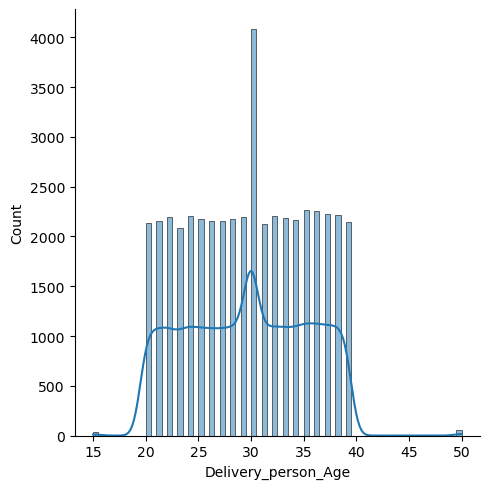

In [48]:
sns.displot(zomato['Delivery_person_Age'], kde = True )
plt.show()

**observation:** we can observe that maximum number of people working are of 30 years age

In [92]:
# created new column of age which is cut into different bins

zomato['age_bin'] = pd.cut(zomato['Delivery_person_Age'],bins = [18,26,33,40,50])

**very imp.** binning is very important feature engineering

In [93]:
zomato.head() 

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


In [94]:
zomato['age_bin'].value_counts()

(26, 33]    17107
(18, 26]    15112
(33, 40]    13274
(40, 50]       53
Name: age_bin, dtype: int64

### distance_km

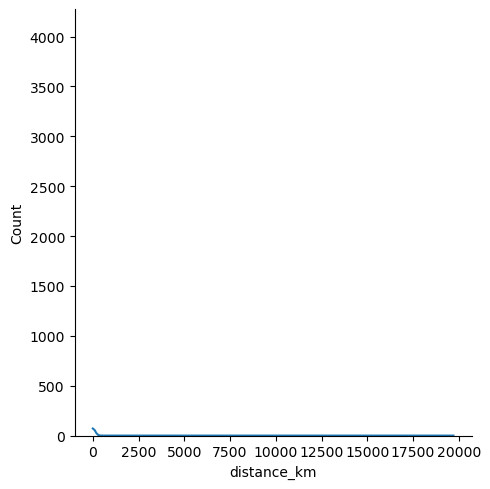

In [95]:
sns.displot(zomato['distance_km'], kde = True )
plt.show()

**observation:** delete the outlier value or replace it with median,

In [96]:
zomato['distance_km'].max()

19709.57554316093

In [97]:
distance_km_median = zomato['distance_km'].median()
distance_km_median

9.24709793542702

#### data cleaning: filtering distance km below 1000 km

In [98]:

zomato=  zomato[zomato['distance_km']<= 100]

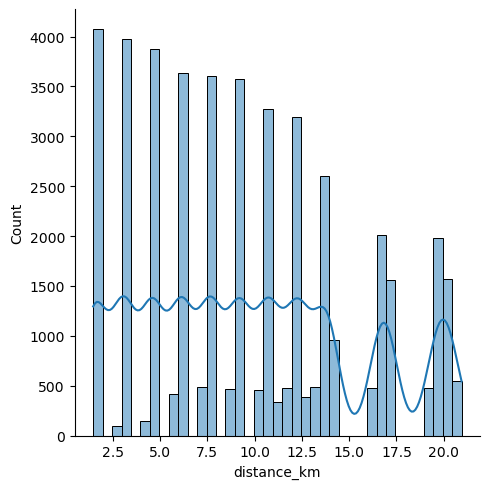

In [99]:
sns.displot(zomato['distance_km'], kde = True )
plt.show()

**Observation:** We can observe that distance is starting from 1 km and max is 20 km

In [100]:
zomato['distance_km'].min()

1.4638371061422368

In [101]:
zomato['distance_km'].max()

20.94290627698551

### Time_taken (min)

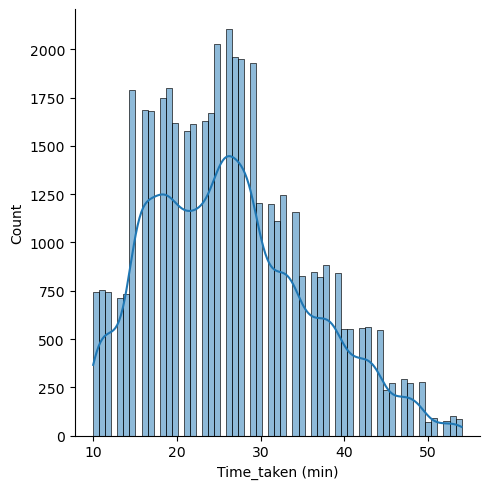

In [102]:
sns.displot(zomato['Time_taken (min)'], kde = True )
plt.show()

**observation** there are 2 peak visible, it means Time_taken is divided into 2 groups. 
<br> graph is right skewed, it means there are outliers in higher side of time taken

### Ratings

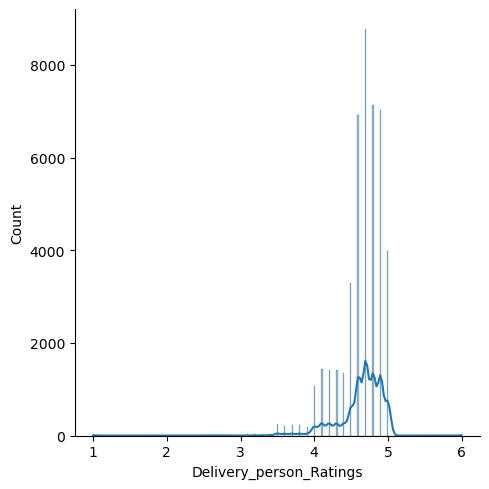

In [104]:
sns.displot(zomato['Delivery_person_Ratings'], kde = True )
plt.show()

**observation** Most of the values lie between 4 to 5

### countplot

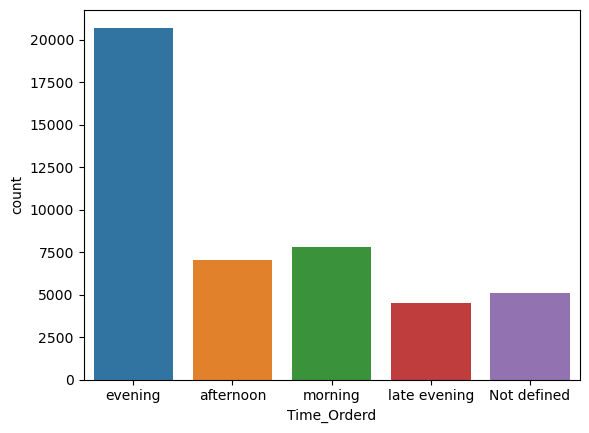

In [148]:
sns.countplot(x = 'Time_Orderd', data = zomato)
plt.show()

In [150]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


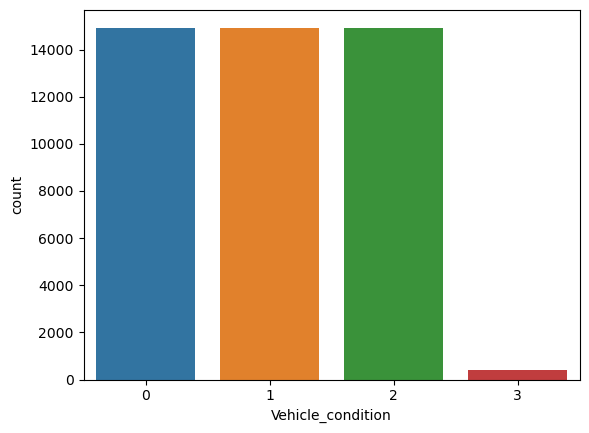

In [151]:
sns.countplot(x = 'Vehicle_condition', data = zomato)
plt.show()

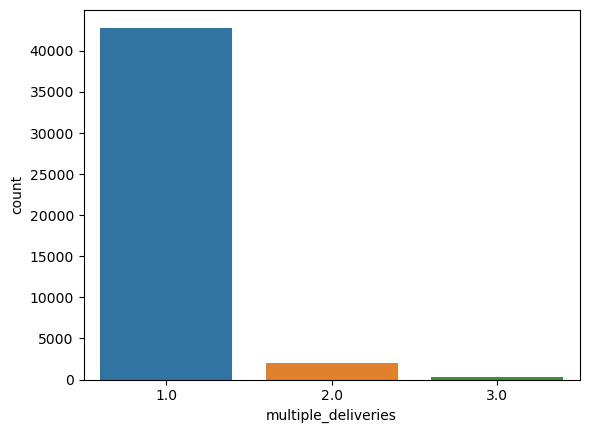

In [152]:
sns.countplot(x = 'multiple_deliveries', data = zomato)
plt.show()

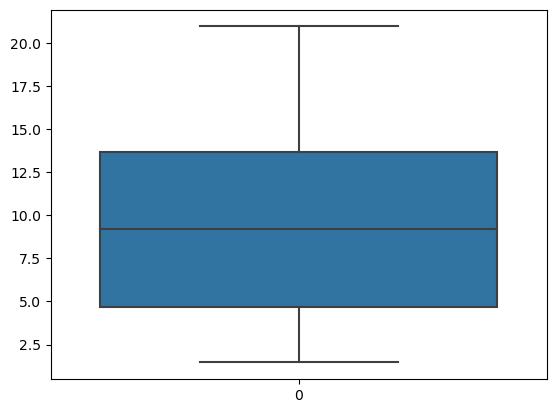

In [105]:
sns.boxplot(zomato['distance_km'])
plt.show()

**Observation** minimum value is around 2 Km, median is around 9 Km and max value is approx 21 Km

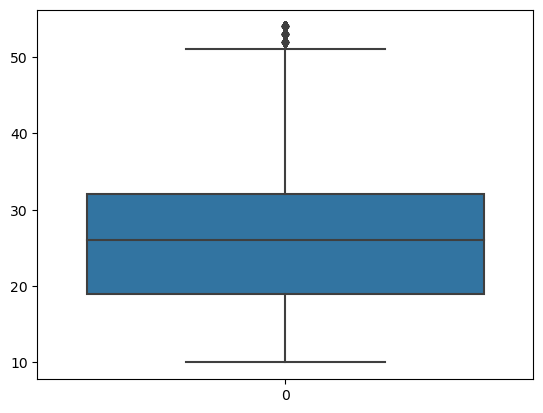

In [106]:
sns.boxplot(zomato['Time_taken (min)'])
plt.show()

**Observation** there are some outliers on the higher end side

## BIVARIATE ANALYSIS

In [108]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


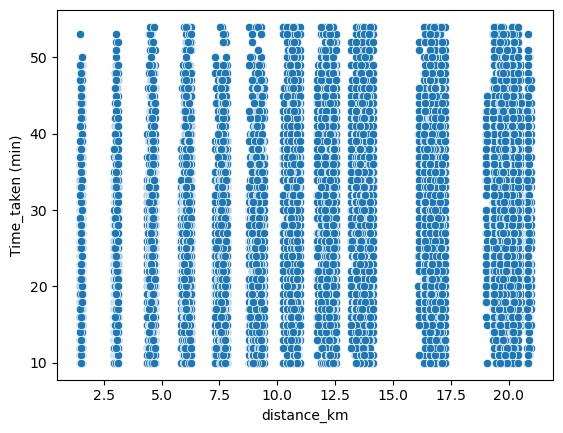

In [111]:
sns.scatterplot(x = 'distance_km', y = 'Time_taken (min)', data = zomato)
plt.show()

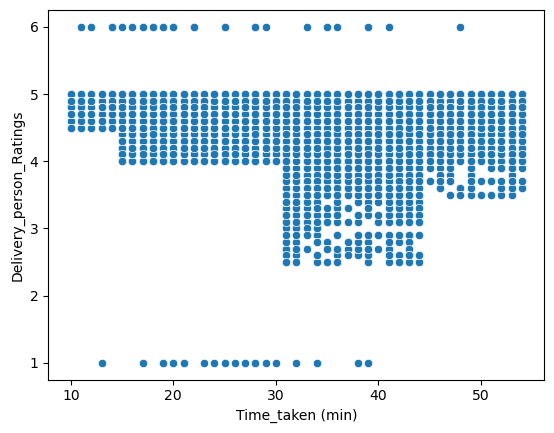

In [113]:
sns.scatterplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', data = zomato)
plt.show()

**observation**: As time_taken is increasing, we can observe that ratings is decreasing (observe between 30 to 45 min)

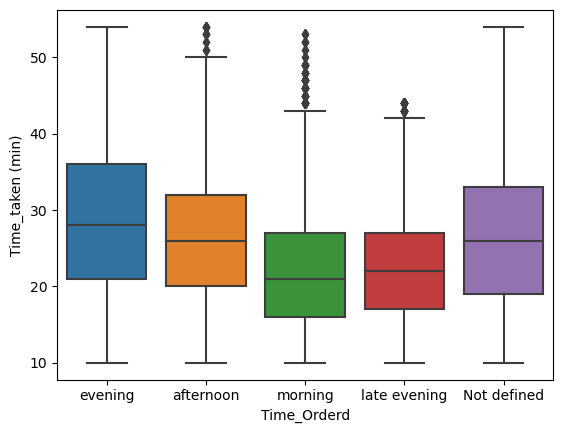

In [114]:
sns.boxplot(x = 'Time_Orderd', y = 'Time_taken (min)',data = zomato)
plt.show()

**observation** Highest median is of evening and in moring median is minimum as compare to other time categories

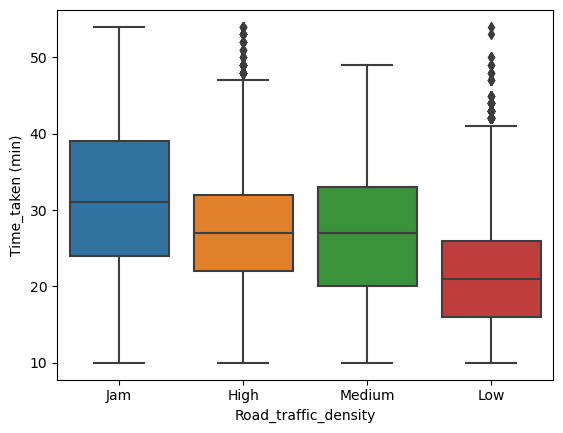

In [115]:
sns.boxplot(x = 'Road_traffic_density', y = 'Time_taken (min)',data = zomato)
plt.show()

**observation** Median of time taken is maximum for ```Jam```

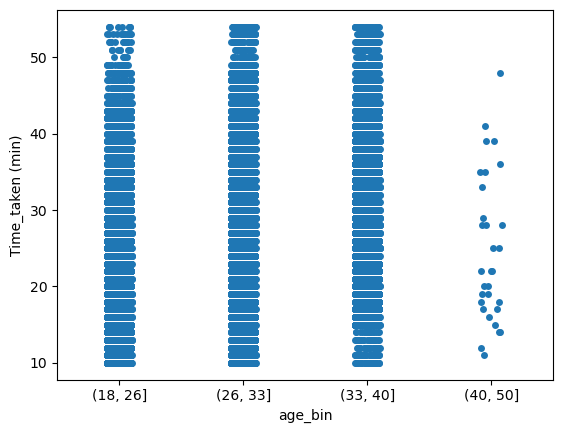

In [118]:
sns.stripplot(x= 'age_bin', y = 'Time_taken (min)',data = zomato)
plt.show()

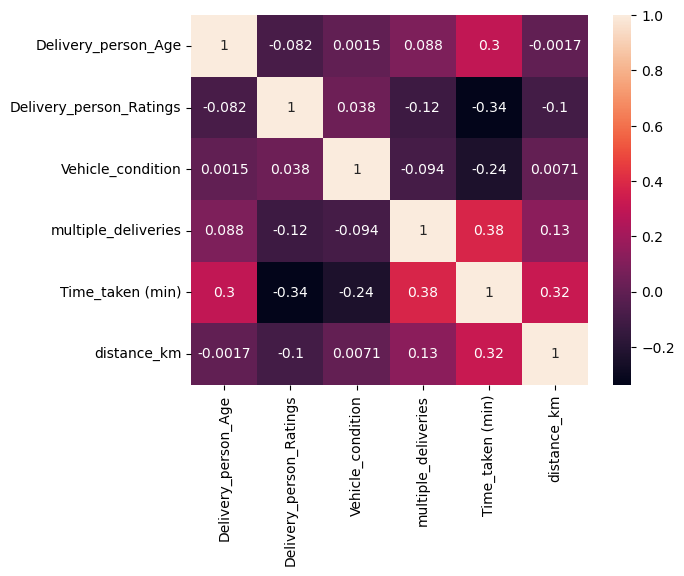

In [119]:
sns.heatmap(zomato.corr(numeric_only = True) ,annot=True)
plt.show()

**Observations**
<br> There is negative correlation between Time taken and ratings ```(-0.34)```
<br> There is negative correlation between Time taken and vehicle condition  ```(-0.24)```
<br> There is positive correlation between Time taken and multiple deliveries ```(0.38)```
<br> There is positive correlation between Time taken and distance ```(0.32)```
<br> There is negative correlation between Time taken and ratings ```(-0.34)```

## MULTIVARIATE ANALYSIS

In [121]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


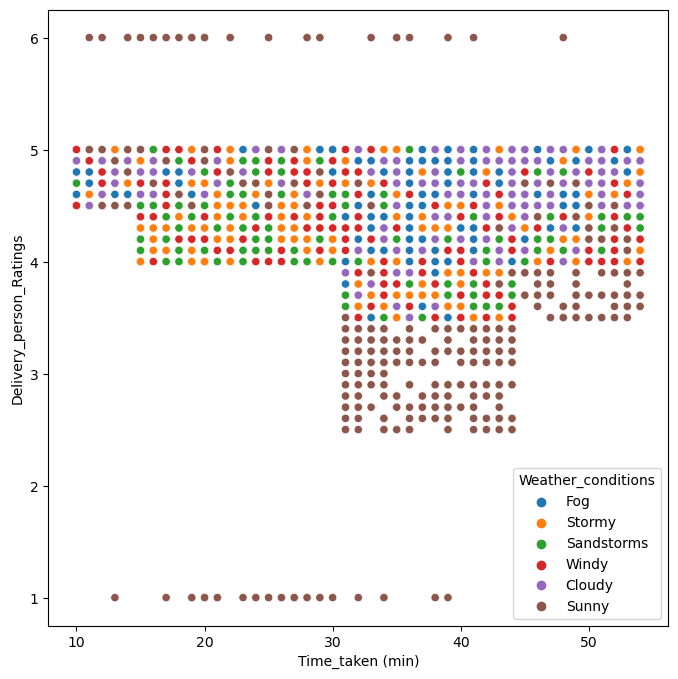

In [130]:
plt.figure(figsize= (8,8))
sns.scatterplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' ,data = zomato)
plt.show()

**Observation** we can observe, between 30 min to 45 Min delivery time, there is sudden drop in ratings. 
<br> All those instances have  **sunny** weather

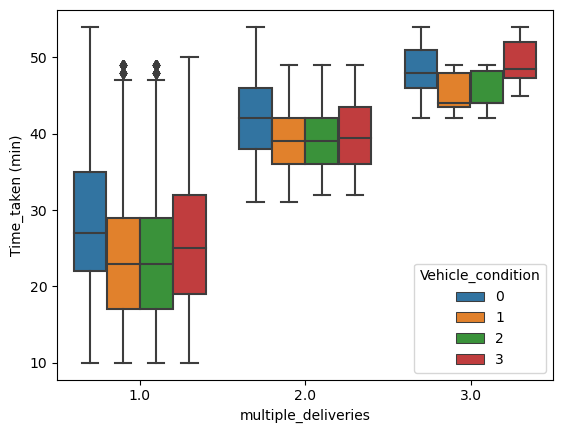

In [131]:
sns.boxplot(x = 'multiple_deliveries', y = 'Time_taken (min)',hue = 'Vehicle_condition',data = zomato)
plt.show()

**Observation** Multiple deliveries impact the time taken, 0 vehicle condition delivery time is higher

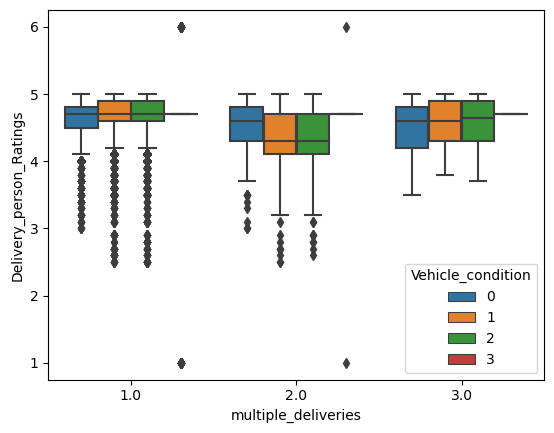

In [133]:
sns.boxplot(x = 'multiple_deliveries', y = 'Delivery_person_Ratings',hue = 'Vehicle_condition',data = zomato)
plt.show()

**Observation** Multiple deliveries impact the ratings

<Figure size 800x800 with 0 Axes>

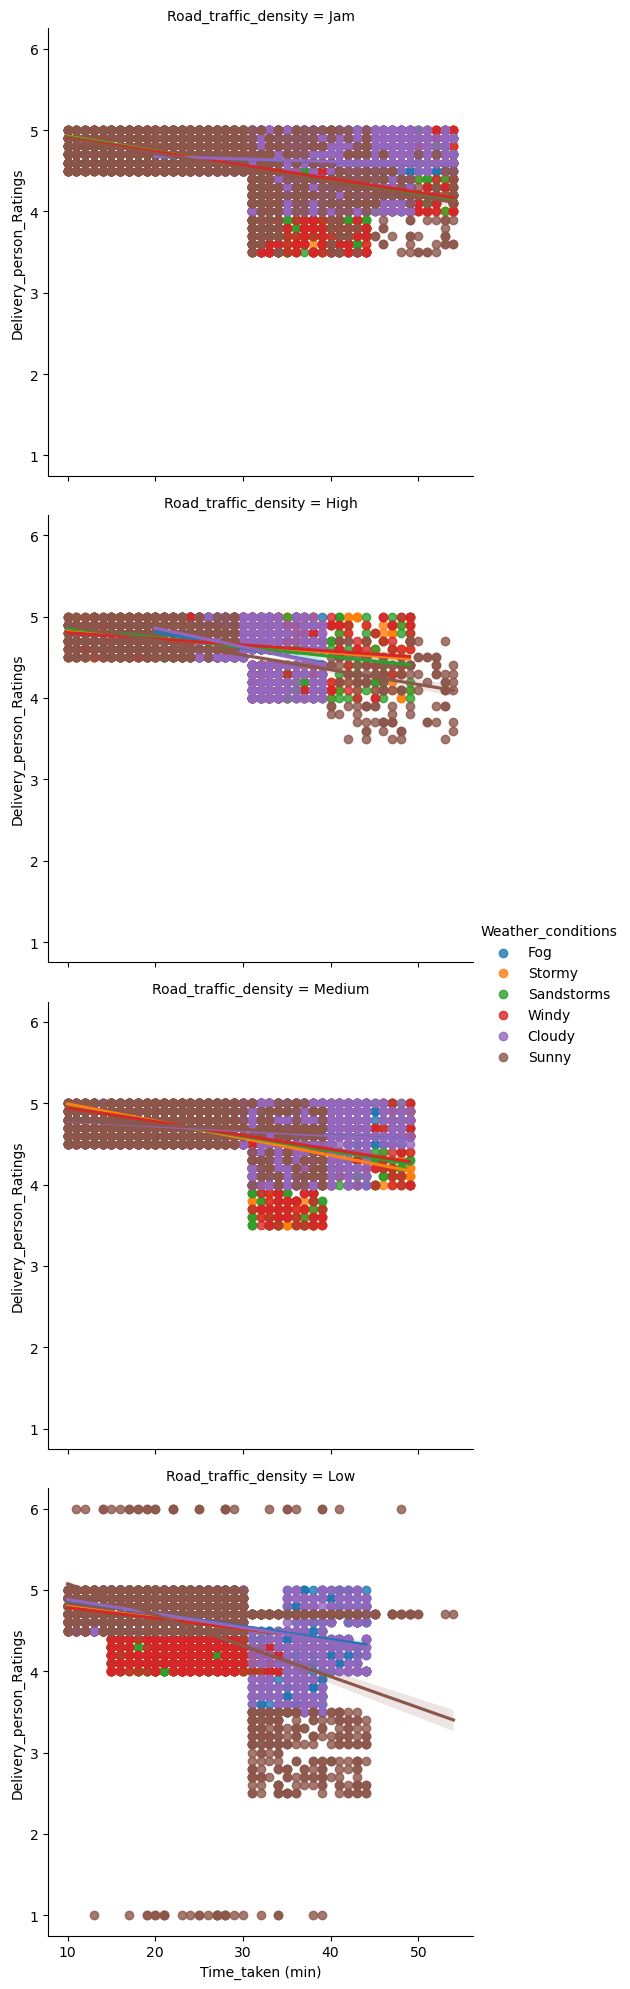

In [136]:
plt.figure(figsize= (8,8))
sns.lmplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' , row = 'Road_traffic_density',data = zomato)
plt.show()

**Observation** When road density is low, weather is sunny and  time taken is more than 30 min then customer has given the delivery agent below 3 ratings

<Figure size 800x800 with 0 Axes>

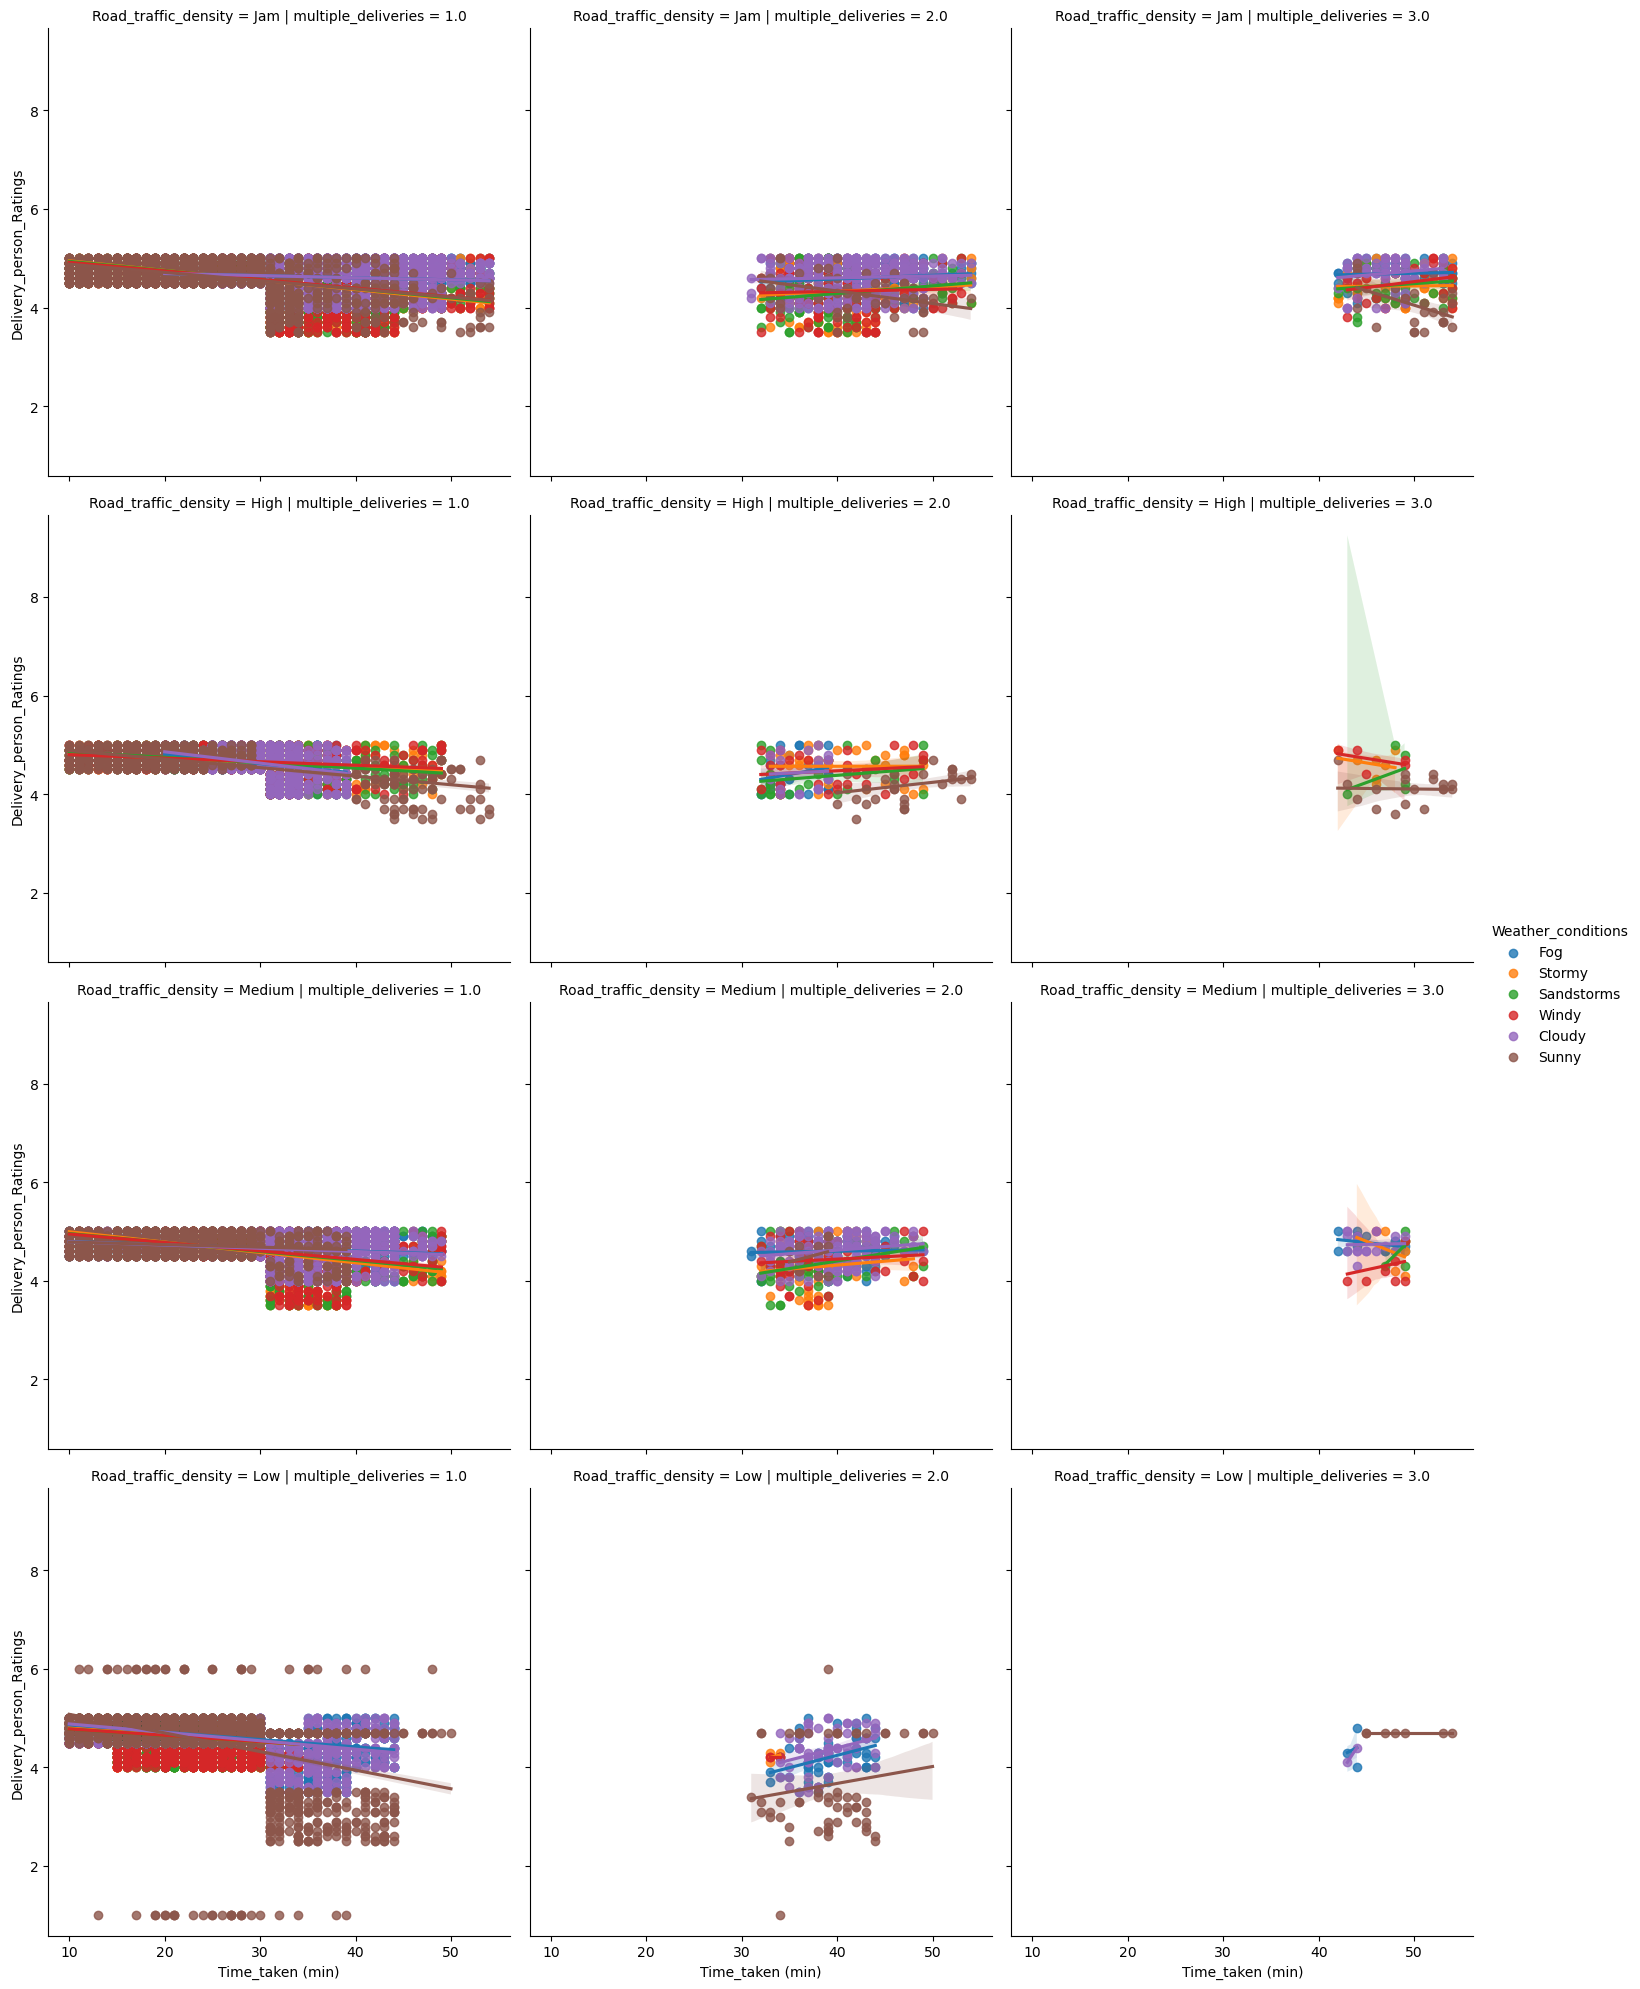

In [144]:
plt.figure(figsize= (8,8))
sns.lmplot(y = 'Delivery_person_Ratings', x = 'Time_taken (min)', hue = 'Weather_conditions' , row = 'Road_traffic_density', col= 'multiple_deliveries' , data = zomato)
plt.show()

**Observation** time taken with multiple delivery is high

C:\Users\Sawan agarwal\AppData\Local\Temp\ipykernel_1888\831709073.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


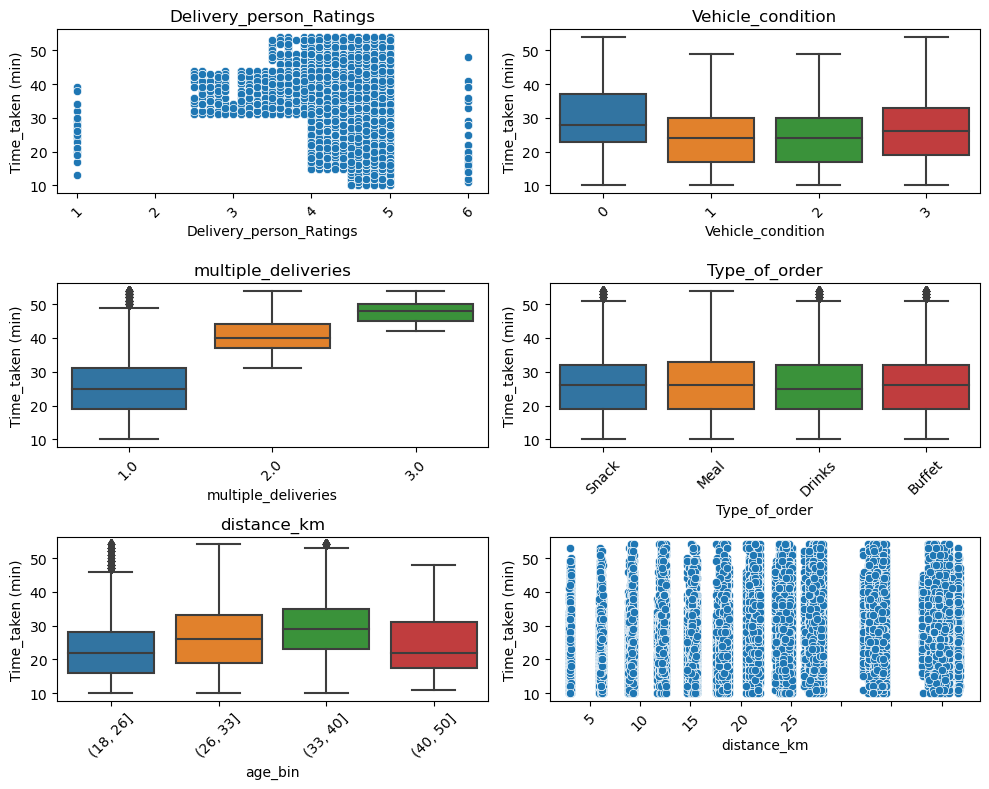

In [149]:



fig, axes = plt.subplots(3, 2, figsize=(10, 8)) 


sns.scatterplot(x= 'Delivery_person_Ratings', y= 'Time_taken (min)', data=zomato, ax=axes[0, 0])
sns.boxplot(x= 'Vehicle_condition', y= 'Time_taken (min)', data=zomato, ax=axes[0, 1])
sns.boxplot(x= 'multiple_deliveries', y= 'Time_taken (min)', data=zomato, ax=axes[1, 0])
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=zomato, ax=axes[1, 1])
sns.boxplot(x='age_bin', y='Time_taken (min)', data=zomato, ax=axes[2, 0])
sns.scatterplot(x = 'distance_km', y = 'Time_taken (min)', data = zomato, ax=axes[2, 1])




axes[0, 0].set_title('Delivery_person_Ratings')
axes[0, 1].set_title('Vehicle_condition')
axes[1, 0].set_title('multiple_deliveries')
axes[1, 1].set_title('Type_of_order')
axes[2, 0].set_title('age_bin')
axes[2, 0].set_title('distance_km')




for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)




plt.tight_layout()


plt.show()


**Observation** Multiple deliveries has highest correlation with time taken.
<br> ratings is affecting time taken
<br> age bins also affecting the time taken 

In [148]:
zomato.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_km,age_bin
0,36.0,4.2,evening,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,"(33, 40]"
1,21.0,4.7,afternoon,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,"(18, 26]"
2,23.0,4.7,afternoon,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,"(18, 26]"
3,34.0,4.3,morning,Sandstorms,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,20,2.927795,"(33, 40]"
4,24.0,4.7,evening,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,"(18, 26]"


In [45]:







# Using FacetGrid
g = sns.FacetGrid(income, col="Weather_conditions", row = "Time_Orderd", height= 3, aspect = 2)


g.map(sns.boxplot, "Type_of_order", 'Time_taken (min)' ) 


plt.tight_layout()
plt.show()


NameError: name 'income' is not defined